**Take Input Image**

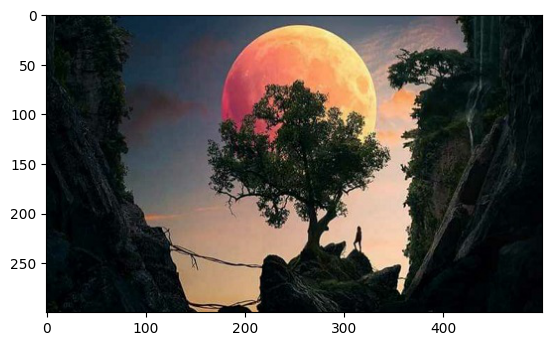

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
img = plt.imread('1.jpg')
plt.imshow(img)


**Boundary Value**

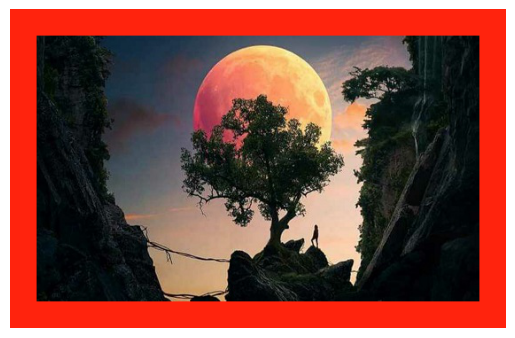

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def add_padding(img, padding_size, color=0):

    if len(img.shape) == 2:
        img_height, img_width = img.shape
        padded_img = np.full((img_height + padding_size * 2, img_width + padding_size * 2), color, dtype=img.dtype)
        padded_img[padding_size:-padding_size, padding_size:-padding_size]
    elif len(img.shape) == 3:
        img_height, img_width, img_channel = img.shape
        padded_img = np.full((img_height + padding_size * 2, img_width + padding_size * 2, img_channel), color, dtype=img.dtype)
        padded_img[padding_size:-padding_size, padding_size:-padding_size] = img
    return padded_img.astype(np.uint8)

def show_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

img = plt.imread('1.jpg')
border_img = add_padding(img, 30, (255,35,13))
show_image(border_img)




**Histogram**

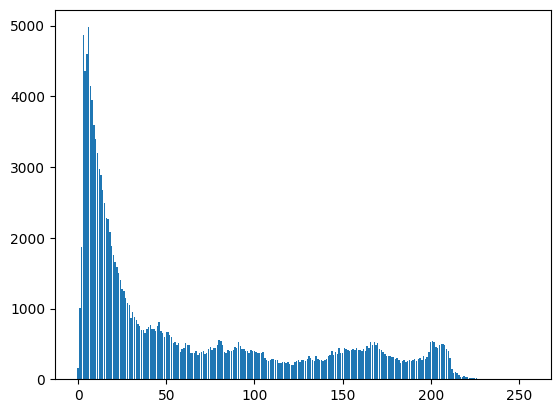

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

def gray_level_histrogram(img):
    h = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            h[img[i,j]] += 1
    return h

def plot_histrogram(h):
    plt.bar(np.arange(256), h)
    plt.show()

img = plt.imread('1.jpg')
histrogram = gray_level_histrogram(gray_image(img))
plot_histrogram(histrogram)

**Histogram Equalization**

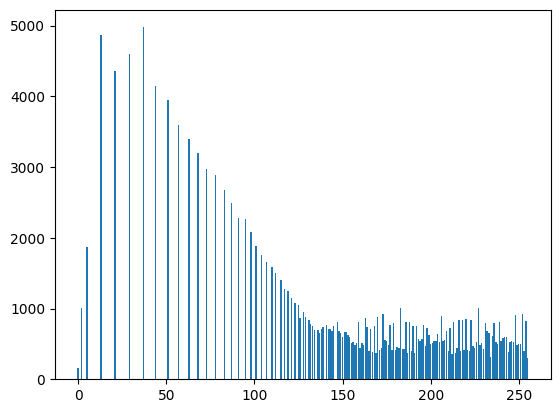

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def gray_image(img):
    return np.mean(img, axis=-1).astype(np.uint8)

def gray_level_histrogram(img):
    h = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            h[img[i,j]] += 1
    return h

def bit_prk(h):
    return h / np.sum(h)
def prk_cdf(prk):
    cdf = np.zeros(256)
    for i in range(256):
        cdf[i] = np.sum(prk[:i+1])
    return cdf

def hist_equalization(cdf, nrk):
    hist_equalization_bit = np.round(cdf * 255).astype(np.uint8)
    hist_nrk = np.zeros(256)
    for i in range(256):
        hist_nrk[hist_equalization_bit[i]] += nrk[i]
    return hist_nrk


def plot_histrogram(h):
    plt.bar(np.arange(256), h)
    plt.show()

img = plt.imread('1.jpg')
nrk = gray_level_histrogram(gray_image(img))
prk = bit_prk(nrk)
cdf = prk_cdf(prk)
new_img = hist_equalization(cdf, nrk)
plot_histrogram(new_img)